In [36]:
# importing the packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from datetime import datetime
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjusts the configurations of plots we will create

pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('movies.csv')
df.shape

(7668, 15)

In [3]:
df.head() #glimpse of the data

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

### Data Cleaning

In [5]:
df.isnull().sum() # missings per column

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [6]:
budget_mean_value = df['budget'].mean()
df['budget'].fillna(budget_mean_value, inplace=True) # replacing Nan values in column "budget" with mean value.

gross_mean_value = df['gross'].mean()
df['gross'].fillna(gross_mean_value, inplace=True) # replacing Nan values in column "gross" with mean value.

votes_mean_value = df['votes'].mean()
df['votes'].fillna(votes_mean_value, inplace=True) # replacing Nan values in column "votes" with mean value.

In [7]:
df.isnull().sum() # missings per column

name         0
rating      77
genre        0
year         0
released     2
score        3
votes        0
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      4
dtype: int64

In [8]:
# Changing data type of the following columns:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [9]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [10]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [11]:
df['year_correct'] = df['released'].str.extract(r'(\d{4})')

In [12]:
df.sort_values(by='gross', inplace = False, ascending = False) # sorting movies by gross value

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103.0,2001
7625,The Untold Story,NaN,Comedy,2019,"January 11, 2019 (United States)",5.7,320,Shane Stanley,Lee Stanley,Miko Hughes,United States,35589876,790,Visual Arts Entertainment,104.0,2019
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93.0,2020
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993


In [15]:
# Drop any duplicates
df.drop_duplicates(inplace = True)

In [16]:
df.shape

(7668, 16)

## What variables are most correlated with the gross revenue?



In [19]:
correlation_matrix = df.corr(method='pearson')
print(correlation_matrix) #Votes and Budget are positively correlated with gross

             year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222810  0.265578  0.252042  0.120811
score    0.097995  1.000000  0.409182  0.064554  0.182868  0.399451
votes    0.222810  0.409182  1.000000  0.421007  0.628713  0.309174
budget   0.265578  0.064554  0.421007  1.000000  0.711270  0.265305
gross    0.252042  0.182868  0.628713  0.711270  1.000000  0.241336
runtime  0.120811  0.399451  0.309174  0.265305  0.241336  1.000000


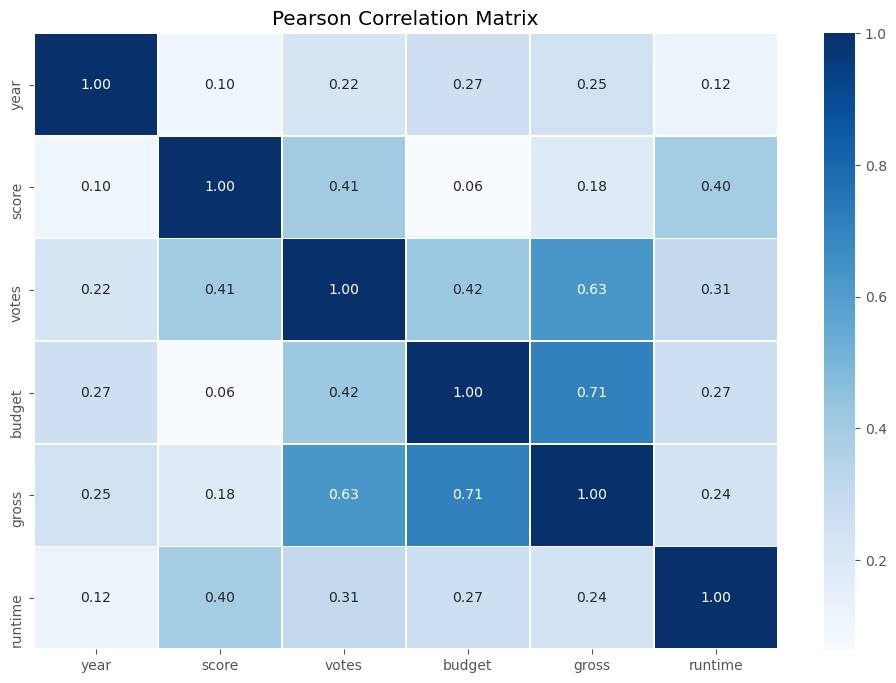

In [34]:
sns.heatmap(correlation_matrix, annot = True, cmap = 'Blues',linewidths=0.5, fmt=".2f")
plt.title('Pearson Correlation Matrix')
plt.show()

In [42]:
# Calculate the correlation coefficient and p-value
corr, p_value = stats.pearsonr(df['budget'], df['gross'])
print(corr, p_value)

# Calculate the correlation coefficient and p-value
corr, p_value = stats.pearsonr(df['votes'], df['gross'])
print(corr, p_value)

0.7112703466796755 0.0
0.6287131745156862 0.0


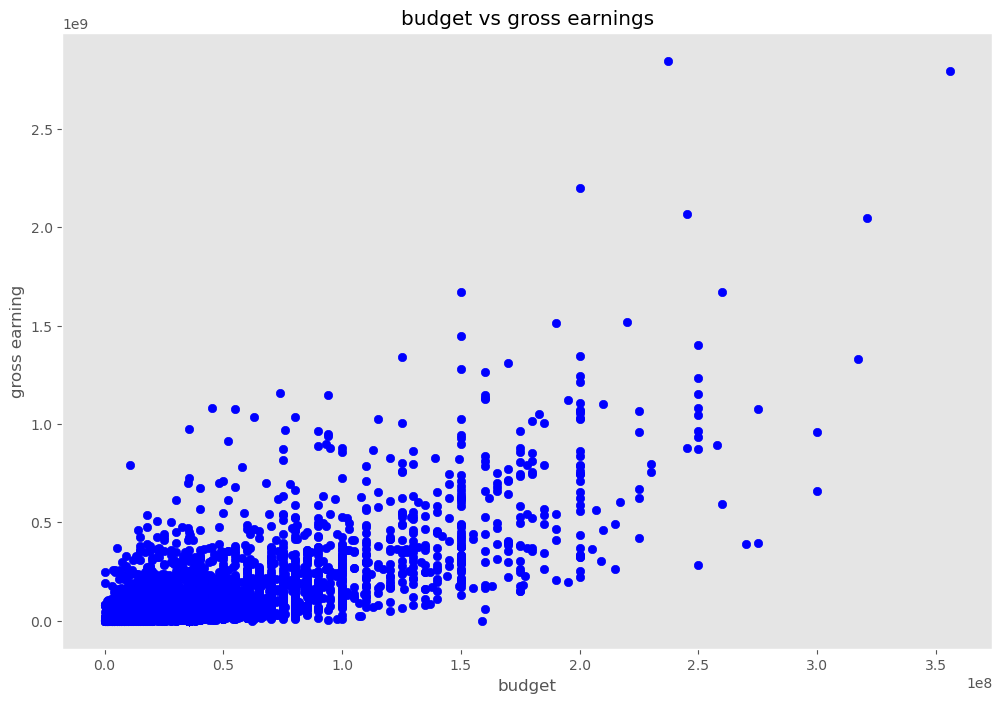

In [30]:
# scatterplot budget vs gross

plt.scatter(df['budget'], df['gross'], label='Data Points', color='blue', marker='o')
plt.title('budget vs gross earnings')
plt.xlabel('budget')
plt.ylabel('gross earning')
plt.grid(False)
plt.grid(False)

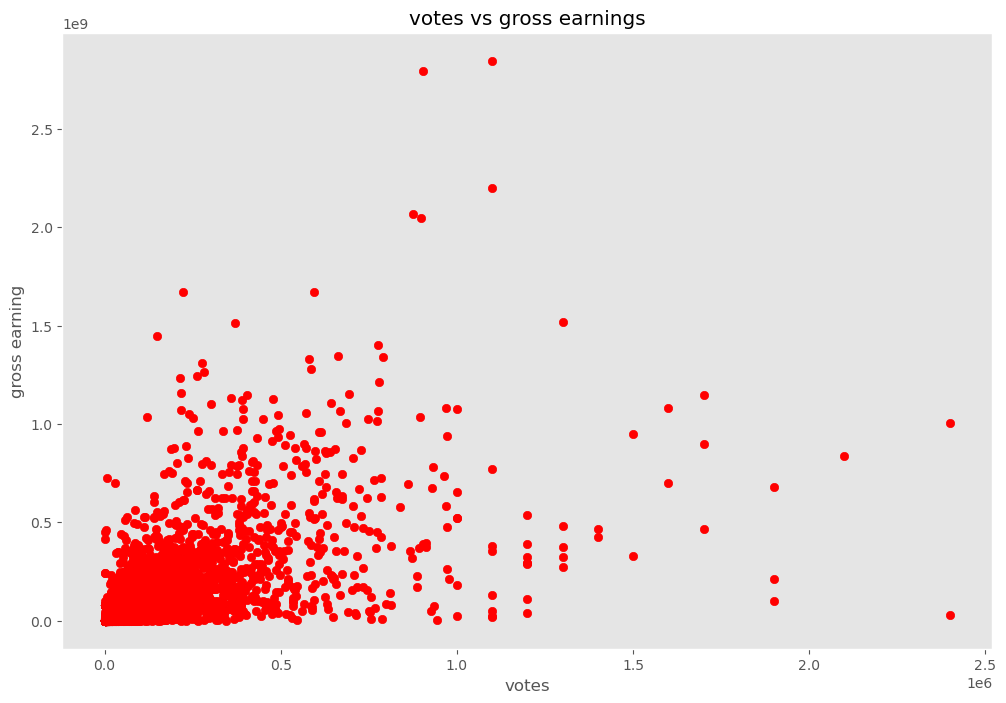

In [33]:
# scatterplot votes vs gross

plt.scatter(df['votes'], df['gross'], label='Data Points', color='red', marker='o')
plt.title('votes vs gross earnings')
plt.xlabel('votes')
plt.ylabel('gross earning')
plt.grid(False)